# Assignment 0 by Prakash Srinivsan, Ryan van der Werf and Jim van Veenhuyzen

In this assignment, we want to obtain a formula for the expected number of distinct values when we generate n random integers between 1 and N. Suppose we have a single integer $a$ between 1 and N that we choose randomly. Now, we generate another random integer $b$, also between 1 and N. Let us first consider what the probability is that $b$ is $\textbf{not}$ equal to $a$. We can do this via recursion:

Take the example of N = 2, such that our range of integers is $\{1,2\}$. Then, the probably that we do not generate 1 is clearly $\frac{1}{2}$. Extending this to N = 3, we have a $\frac{2}{3}$ chance that we do not generate our initial integer $a$. The next few probabilities in this sequence are: $\frac{3}{4}, \frac{4}{5}, \frac{5}{6},...,$etc. From this sequence we can recognize that extending this principle to size N results in a probably of $\textbf{not}$ generating the integer $a$ as $\frac{N-1}{N}$. Repeating this process one addition time results in a probablility that is just the product of $\frac{N-1}{N}$ with itself, because the two selections are independent events. So, repeating the process n times results in the following probability of $\textbf{not}$ selecting the integer:

$$
  \mathbb{P}(a \neq b) = \big( \frac{N-1}{N}\big)^n = \big( 1 - \frac{1}{N}\big)^n 
$$

The total probability of any event is 1, so we can use this to deduce that the probability of selecting the integer $a$ as:

$$
   \mathbb{P}(a = b) = 1 - \big( 1 - \frac{1}{N}\big)^n 
$$

Finally, because there are N possible integers $a$ we could select we multiply the expression above by N, which results in the final expression for the number of distinct values we expect to find:


$$
   \{\text{num of distinct values}\} = N\Big(1 - \big( 1 - \frac{1}{N}\big)^n \Big)
$$

In [21]:
import numpy as np 
import matplotlib.pyplot as plt

In [17]:
def distinct_values(n, N):
    """
    Function that computes the number of distinct values using the derived equation
    """
    return N*(1 - (1-1/N)**n)

def approx(n, N):
    """
    Function that approximates the expected number of distinct values if N>>1, which allows N*(1 - (1-1/N)**n) to be 
    rewritten as N*(1 - exp(-n/N)). This approximated value is compared to the 'real' value for different N values.
    """
    return N*(1 - np.exp(-n/N))

In [28]:
def testing(n, N, k, show_results):
    """
    Function that tests if the expected number of distinct values corresponds to the experiments
    
    Parameters 
    ----------
    'n' = number of random integers between 1 and N
    'k' = nubmer of times the experiment is run
    'show_results' = if True=> array that shows the experiment is shown
    """
    n_value = n
    N_value = N
    N_range = np.arange(1, N_value, 1)

    for l in range(0, k):
        nr = 0 #number of unique values
        repeat = 0
        zeros = np.zeros(N_value)

        for i in range(0, n_value):
            integer = np.random.randint(1, N_value+1)
            if integer in zeros: 
                repeat+=1
            else:
                zeros[integer-1]=integer
                nr+=1
        if show_results==True:
            print('-'*30)
            print('Index of experiment:', l)
            #print('Last random integer:', integer)        
            print('Generated integers:', zeros)
            print('Number of distinct values:', nr)
            print('Number of repeated values:', repeat)
        plt.scatter(l, nr)
    
    nr_expected = 0
    nr_approx = 0
    for i in range(1, n_value+1):
        nr_expected = distinct_values(i, N_value)
        nr_approx = approx(i, N_value)
    print('Expected number of distinct values: {:.3f}'.format(nr_expected))
    print('Approx expected number of distinct values: {:.3f}'.format(nr_approx)) #prints the expected number of distinct values based
                                                                   # on the approx(n, N) function 
    print('Difference = {:.2f} %'.format( (nr_expected - nr_approx)/nr_approx * 100 ))
    
    plt.axhline(nr_expected, linestyle='dashed', label='Expected number of distinct values')
    

        
    plt.ylim(0, nr_expected*1.5)
    plt.xlabel('Test index')
    plt.ylabel('Number of distinct values')
    plt.legend()
    plt.show()
    


   
    
    


In the code below we do some testing of the derived equation and compare it with the value from the function that approximates the number of distinct values for N $\gg$ 1. We see that as expected, the results of the formulas converge as N gradually increases to the limit $\gg$ 1. For example, the difference is only 0.03$\%$ for N,n = 1000. 

------------------------------
Index of experiment: 0
Generated integers: [1. 0.]
Number of distinct values: 1
Number of repeated values: 1
------------------------------
Index of experiment: 1
Generated integers: [1. 0.]
Number of distinct values: 1
Number of repeated values: 1
------------------------------
Index of experiment: 2
Generated integers: [0. 2.]
Number of distinct values: 1
Number of repeated values: 1
------------------------------
Index of experiment: 3
Generated integers: [1. 2.]
Number of distinct values: 2
Number of repeated values: 0
------------------------------
Index of experiment: 4
Generated integers: [1. 0.]
Number of distinct values: 1
Number of repeated values: 1
------------------------------
Index of experiment: 5
Generated integers: [1. 2.]
Number of distinct values: 2
Number of repeated values: 0
------------------------------
Index of experiment: 6
Generated integers: [0. 2.]
Number of distinct values: 1
Number of repeated values: 1
--------------------

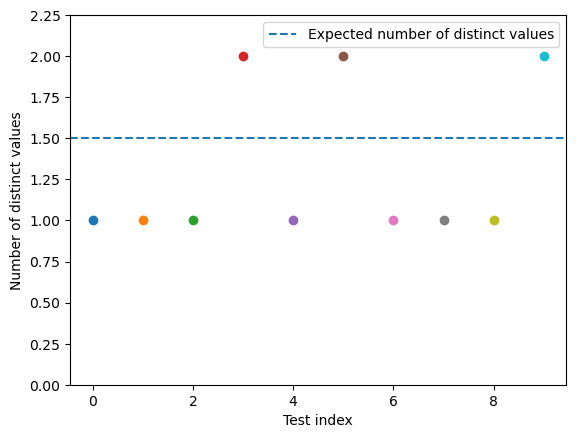

In [29]:
testing(2, 2, 10, True) 

Expected number of distinct values: 1.750
Approx expected number of distinct values: 1.574
Difference = 11.19 %


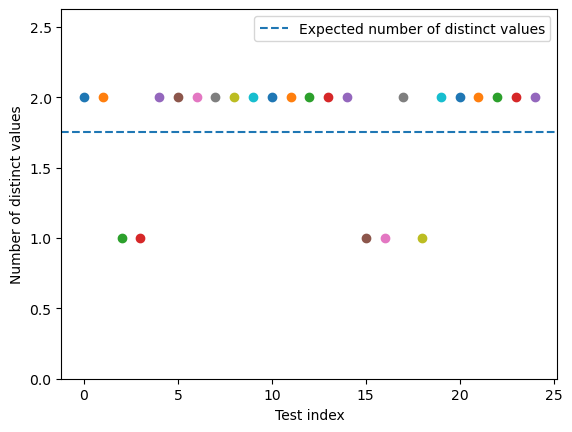

In [24]:
testing(2, 4, 25, False)  

Expected number of distinct values: 63.397
Approx expected number of distinct values: 63.212
Difference = 0.29 %


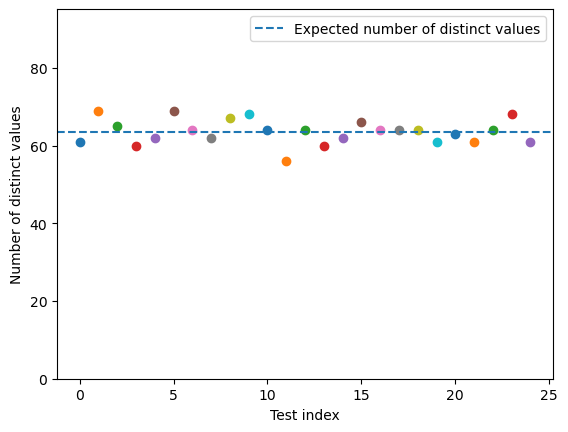

In [25]:
testing(100, 100, 25, False) 

Expected number of distinct values: 87.576
Approx expected number of distinct values: 87.471
Difference = 0.12 %


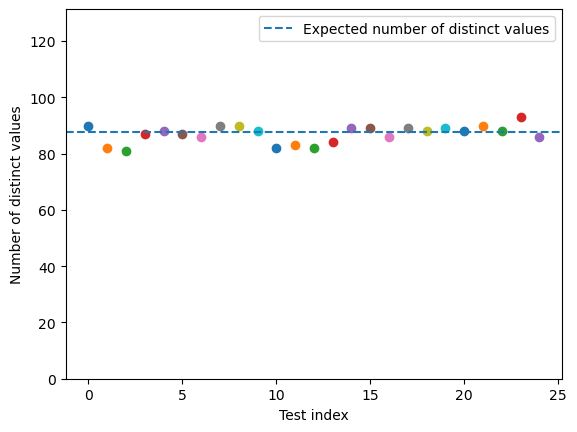

In [26]:
testing(100, 365, 25, False) 

Expected number of distinct values: 632.305
Approx expected number of distinct values: 632.121
Difference = 0.03 %


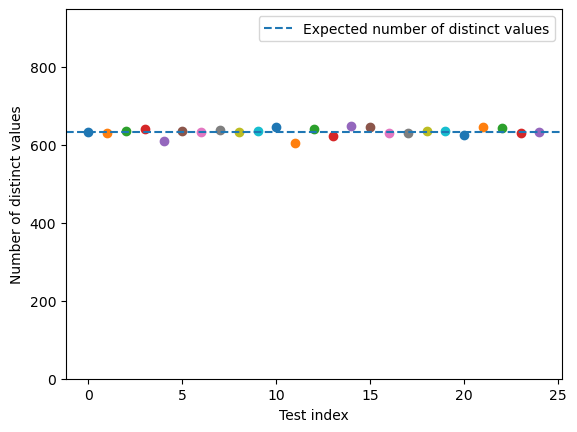

In [30]:
testing(1000, 1000, 25, False) 